<a href="https://colab.research.google.com/github/EugeneDyw/Stat6289/blob/main/HW3/TSLA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

file_path='/content/drive/MyDrive/Colab Notebooks/6289HW3/TSLA.csv'
# Load data from the provided CSV file and parse dates
data = pd.read_csv(file_path, parse_dates=True, index_col="Date")
#data


In [2]:
# Create dataset function
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset.iloc[i:(i + look_back), 0]  # assuming 'Close' column is the first
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])  # target is the 'Close' value after the look_back period
    return np.array(dataX), np.array(dataY)


1. Use a LSTM model with 2 layers, batch size=32 to see which time lag performs better

In [14]:
def train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32, epochs=10):
    model_lap = Sequential()

    # First LSTM layer
    model_lap.add(LSTM(units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_lap.add(Dropout(0.5))


    for _ in range(hidden_layers - 1):
        model_lap.add(LSTM(units, activation='relu', return_sequences=True if _ < hidden_layers - 2 else False))
        model_lap.add(Dropout(0.5))


    model_lap.add(Dense(1))
    # Compile model
    model_lap.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    model_lap.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    return model_lap

Epoch 1/10
32/32 [==============================] - 3s 9ms/step - loss: 0.0115
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 7/10
32/32 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/10
8/8 [==============================] - 0s 3ms/step


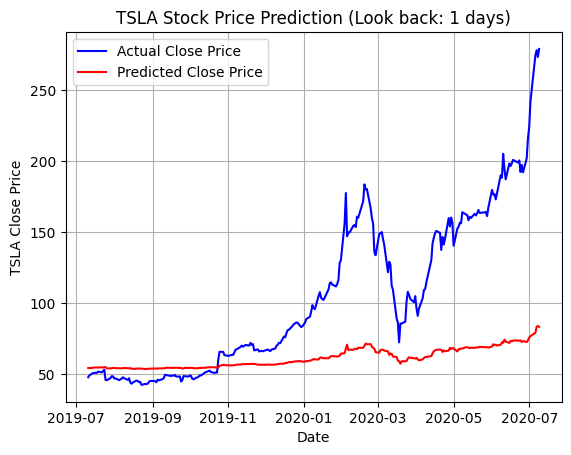

Epoch 1/10
32/32 [==============================] - 4s 55ms/step - loss: 0.0068
Epoch 2/10
32/32 [==============================] - 2s 62ms/step - loss: 0.0012
Epoch 3/10
32/32 [==============================] - 1s 35ms/step - loss: 8.5438e-04
Epoch 4/10
32/32 [==============================] - 1s 28ms/step - loss: 5.7271e-04
Epoch 5/10
32/32 [==============================] - 1s 28ms/step - loss: 3.3174e-04
Epoch 6/10
32/32 [==============================] - 1s 29ms/step - loss: 2.9448e-04
Epoch 7/10
32/32 [==============================] - 1s 29ms/step - loss: 2.7179e-04
Epoch 8/10
32/32 [==============================] - 1s 27ms/step - loss: 2.6578e-04
Epoch 9/10
32/32 [==============================] - 1s 27ms/step - loss: 2.9268e-04
Epoch 10/10
8/8 [==============================] - 0s 5ms/step


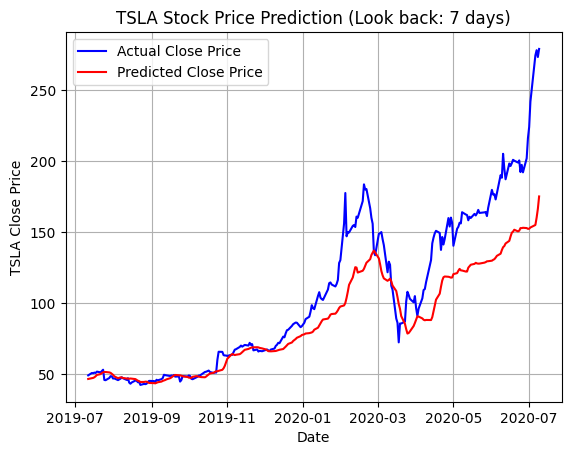

Epoch 1/10
32/32 [==============================] - 6s 104ms/step - loss: 0.0055
Epoch 2/10
32/32 [==============================] - 2s 49ms/step - loss: 8.8364e-04
Epoch 3/10
32/32 [==============================] - 2s 53ms/step - loss: 6.0400e-04
Epoch 4/10
32/32 [==============================] - 2s 49ms/step - loss: 4.4929e-04
Epoch 5/10
32/32 [==============================] - 2s 51ms/step - loss: 3.6115e-04
Epoch 6/10
32/32 [==============================] - 2s 52ms/step - loss: 3.7634e-04
Epoch 7/10
32/32 [==============================] - 2s 52ms/step - loss: 3.7279e-04
Epoch 8/10
32/32 [==============================] - 4s 112ms/step - loss: 3.5019e-04
Epoch 9/10
32/32 [==============================] - 2s 59ms/step - loss: 3.3565e-04
Epoch 10/10
8/8 [==============================] - 1s 10ms/step


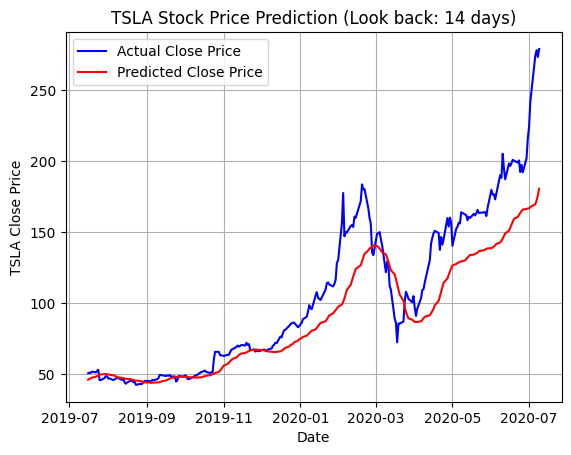

In [15]:
# List of look_back values to compare
look_back_values = [1, 7, 14]

# Iterate over each look_back value
for look_back in look_back_values:

    # Prepare dataset
    X, Y = create_dataset(data[['Close']], look_back)

      # Initialize and fit the scalers for each iteration
    X_scaler = MinMaxScaler()
    X_normalized = X_scaler.fit_transform(X)

    Y_scaler = MinMaxScaler()
    Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)

    # Train the LSTM model
    model_lap = train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32)

    # Predict prices
    predicted_prices = model_lap.predict(X_test)
    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    # Results DataFrame
    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    # Visualization
    plt.title(f'TSLA Stock Price Prediction (Look back: {look_back} days)')
    plt.plot(data.index[look_back:][len(X_train):], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[look_back:][len(X_train):], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()


Use time lag=7 to compare different models

In [16]:

#Time lag can be changed to 1 or 14 days. Use 7 here since it performs best
look_back = 7
X, Y = create_dataset(data[['Close']], look_back)

# Normalize the data
X_scaler = MinMaxScaler()
X_normalized = X_scaler.fit_transform(X)

Y_scaler = MinMaxScaler()
Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

# Reshape the input data for LSTM: [samples, time steps, features]
X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (1001, 7, 1)
1001 train samples
251 test samples


Train models with different hidden layers(1, 2 or 4) and different batch size(64, 32 or 16)

Visualize the result

Epoch 1/10
16/16 [==============================] - 8s 69ms/step - loss: 0.0111
Epoch 2/10
16/16 [==============================] - 1s 66ms/step - loss: 0.0070
Epoch 3/10
16/16 [==============================] - 1s 68ms/step - loss: 0.0027
Epoch 4/10
16/16 [==============================] - 1s 68ms/step - loss: 0.0021
Epoch 5/10
16/16 [==============================] - 2s 137ms/step - loss: 0.0020
Epoch 6/10
16/16 [==============================] - 2s 132ms/step - loss: 0.0020
Epoch 7/10
16/16 [==============================] - 2s 104ms/step - loss: 0.0019
Epoch 8/10
16/16 [==============================] - 2s 153ms/step - loss: 0.0017
Epoch 9/10
16/16 [==============================] - 1s 71ms/step - loss: 0.0014
Epoch 10/10
8/8 [==============================] - 1s 19ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              48.676640
1             50.700001              49.203915
2             50.476002              49.102512
3             50.972000 

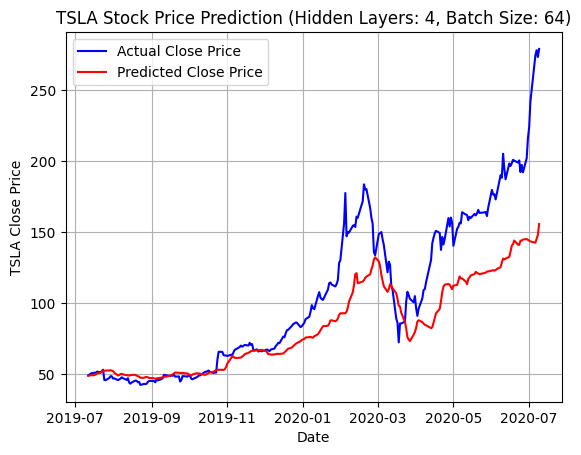

Epoch 1/10
16/16 [==============================] - 5s 40ms/step - loss: 0.0107
Epoch 2/10
16/16 [==============================] - 1s 42ms/step - loss: 0.0056
Epoch 3/10
16/16 [==============================] - 1s 58ms/step - loss: 0.0019
Epoch 4/10
16/16 [==============================] - 2s 107ms/step - loss: 0.0017
Epoch 5/10
16/16 [==============================] - 2s 138ms/step - loss: 0.0013
Epoch 6/10
16/16 [==============================] - 2s 152ms/step - loss: 0.0012
Epoch 7/10
16/16 [==============================] - 2s 151ms/step - loss: 0.0010
Epoch 8/10
16/16 [==============================] - 2s 116ms/step - loss: 7.5542e-04
Epoch 9/10
16/16 [==============================] - 1s 40ms/step - loss: 4.7265e-04
Epoch 10/10
8/8 [==============================] - 1s 10ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              45.829880
1             50.700001              46.402962
2             50.476002              46.424805
3             5

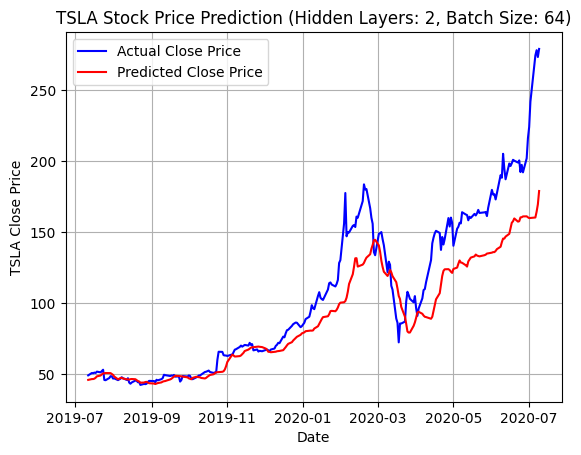

Epoch 1/10
16/16 [==============================] - 4s 29ms/step - loss: 0.0107
Epoch 2/10
16/16 [==============================] - 0s 29ms/step - loss: 0.0057
Epoch 3/10
16/16 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 4/10
16/16 [==============================] - 0s 28ms/step - loss: 0.0012
Epoch 5/10
16/16 [==============================] - 0s 30ms/step - loss: 0.0010
Epoch 6/10
16/16 [==============================] - 0s 28ms/step - loss: 8.2872e-04
Epoch 7/10
16/16 [==============================] - 0s 29ms/step - loss: 7.0987e-04
Epoch 8/10
16/16 [==============================] - 0s 27ms/step - loss: 4.8026e-04
Epoch 9/10
16/16 [==============================] - 0s 29ms/step - loss: 3.5256e-04
Epoch 10/10
8/8 [==============================] - 0s 5ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              46.531181
1             50.700001              47.065231
2             50.476002              47.260334
3            

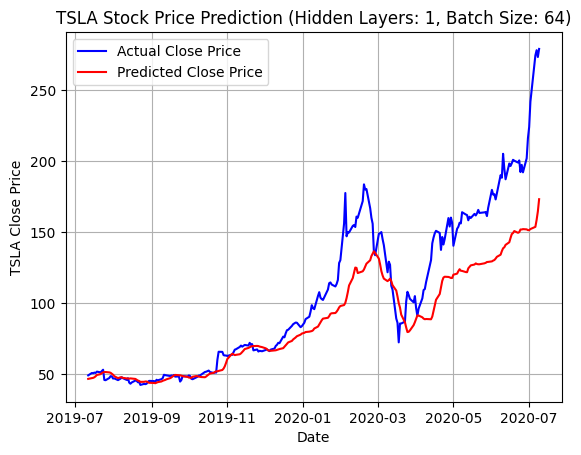

Epoch 1/10
32/32 [==============================] - 10s 69ms/step - loss: 0.0087
Epoch 2/10
32/32 [==============================] - 2s 70ms/step - loss: 0.0022
Epoch 3/10
32/32 [==============================] - 2s 67ms/step - loss: 0.0020
Epoch 4/10
32/32 [==============================] - 2s 70ms/step - loss: 0.0018
Epoch 5/10
32/32 [==============================] - 4s 139ms/step - loss: 0.0013
Epoch 6/10
32/32 [==============================] - 2s 71ms/step - loss: 5.2890e-04
Epoch 7/10
32/32 [==============================] - 2s 70ms/step - loss: 4.7020e-04
Epoch 8/10
32/32 [==============================] - 2s 70ms/step - loss: 3.9687e-04
Epoch 9/10
32/32 [==============================] - 2s 71ms/step - loss: 4.4125e-04
Epoch 10/10
8/8 [==============================] - 2s 8ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              45.623367
1             50.700001              46.415844
2             50.476002              46.261600
3          

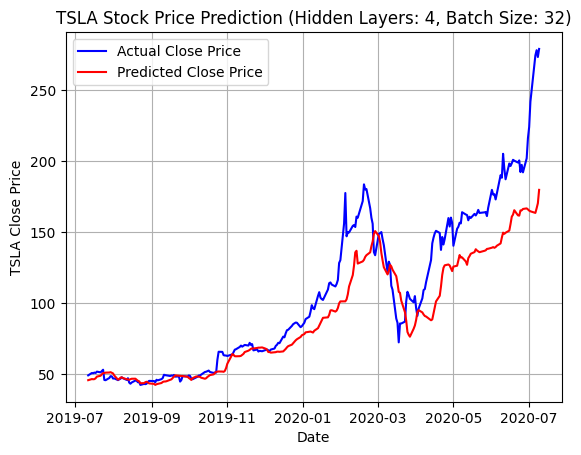

Epoch 1/10
32/32 [==============================] - 5s 43ms/step - loss: 0.0080
Epoch 2/10
32/32 [==============================] - 1s 43ms/step - loss: 0.0017
Epoch 3/10
32/32 [==============================] - 2s 73ms/step - loss: 0.0013
Epoch 4/10
32/32 [==============================] - 3s 81ms/step - loss: 8.7060e-04
Epoch 5/10
32/32 [==============================] - 1s 43ms/step - loss: 4.8455e-04
Epoch 6/10
32/32 [==============================] - 1s 41ms/step - loss: 3.7992e-04
Epoch 7/10
32/32 [==============================] - 1s 44ms/step - loss: 3.5577e-04
Epoch 8/10
32/32 [==============================] - 1s 43ms/step - loss: 3.7684e-04
Epoch 9/10
32/32 [==============================] - 1s 43ms/step - loss: 3.4978e-04
Epoch 10/10
8/8 [==============================] - 0s 7ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              46.188663
1             50.700001              46.799427
2             50.476002              46.836349
3    

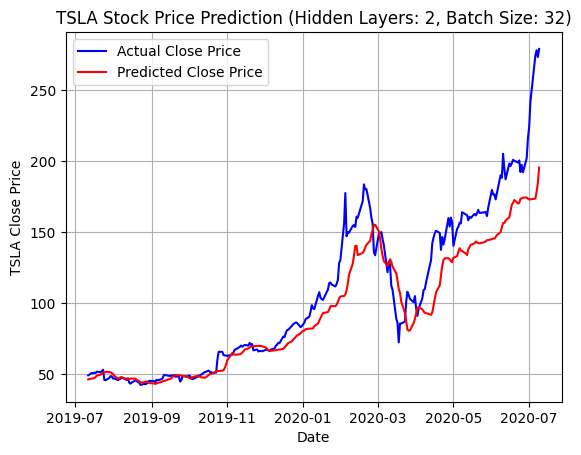

Epoch 1/10
32/32 [==============================] - 5s 33ms/step - loss: 0.0078
Epoch 2/10
32/32 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 3/10
32/32 [==============================] - 1s 30ms/step - loss: 9.4545e-04
Epoch 4/10
32/32 [==============================] - 1s 30ms/step - loss: 5.6783e-04
Epoch 5/10
32/32 [==============================] - 1s 30ms/step - loss: 3.2875e-04
Epoch 6/10
32/32 [==============================] - 1s 29ms/step - loss: 2.8902e-04
Epoch 7/10
32/32 [==============================] - 1s 29ms/step - loss: 2.7847e-04
Epoch 8/10
32/32 [==============================] - 1s 30ms/step - loss: 2.9350e-04
Epoch 9/10
32/32 [==============================] - 1s 32ms/step - loss: 2.9999e-04
Epoch 10/10
8/8 [==============================] - 0s 5ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              45.980392
1             50.700001              46.525501
2             50.476002              46.737282
3

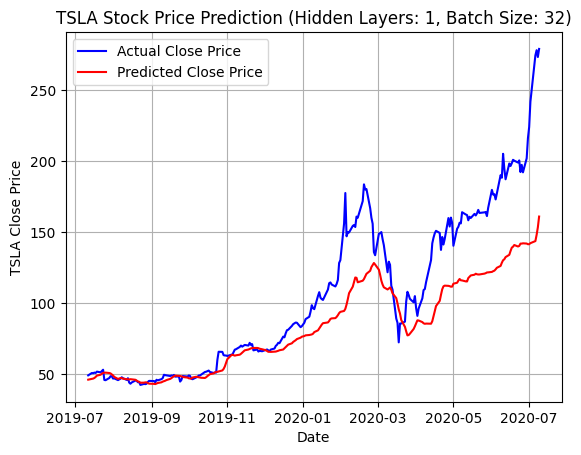

Epoch 1/10
63/63 [==============================] - 16s 115ms/step - loss: 0.0056
Epoch 2/10
63/63 [==============================] - 5s 81ms/step - loss: 0.0020
Epoch 3/10
63/63 [==============================] - 5s 79ms/step - loss: 0.0011
Epoch 4/10
63/63 [==============================] - 7s 114ms/step - loss: 4.1132e-04
Epoch 5/10
63/63 [==============================] - 5s 72ms/step - loss: 4.3210e-04
Epoch 6/10
63/63 [==============================] - 6s 89ms/step - loss: 4.2468e-04
Epoch 7/10
63/63 [==============================] - 6s 87ms/step - loss: 3.9719e-04
Epoch 8/10
63/63 [==============================] - 5s 74ms/step - loss: 3.4941e-04
Epoch 9/10
63/63 [==============================] - 7s 106ms/step - loss: 4.0390e-04
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              45.486519
1             50.700001              46.238724
2             50.476002              46.096355
3

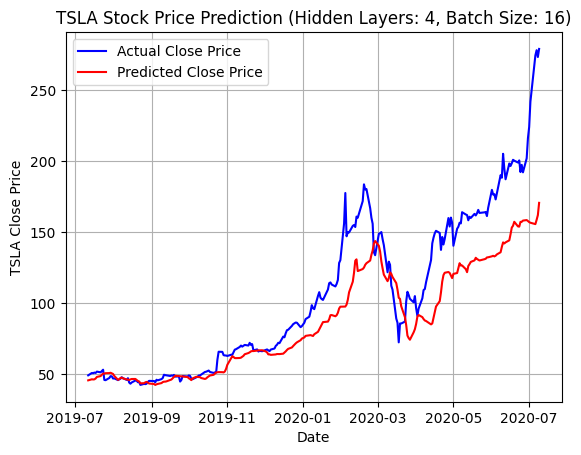

Epoch 1/10
63/63 [==============================] - 9s 71ms/step - loss: 0.0050
Epoch 2/10
63/63 [==============================] - 3s 46ms/step - loss: 0.0012
Epoch 3/10
63/63 [==============================] - 3s 45ms/step - loss: 4.6760e-04
Epoch 4/10
63/63 [==============================] - 3s 47ms/step - loss: 3.4501e-04
Epoch 5/10
63/63 [==============================] - 5s 80ms/step - loss: 3.7215e-04
Epoch 6/10
63/63 [==============================] - 3s 43ms/step - loss: 3.4413e-04
Epoch 7/10
63/63 [==============================] - 3s 44ms/step - loss: 3.2518e-04
Epoch 8/10
63/63 [==============================] - 3s 44ms/step - loss: 3.2110e-04
Epoch 9/10
63/63 [==============================] - 5s 74ms/step - loss: 3.3558e-04
Epoch 10/10
8/8 [==============================] - 0s 6ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              46.640190
1             50.700001              47.269943
2             50.476002              47.317307
3

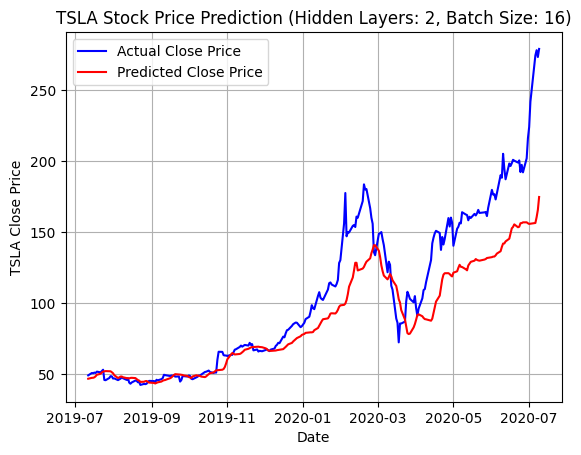

Epoch 1/10
63/63 [==============================] - 5s 31ms/step - loss: 0.0046
Epoch 2/10
63/63 [==============================] - 2s 34ms/step - loss: 8.3923e-04
Epoch 3/10
63/63 [==============================] - 4s 61ms/step - loss: 3.7335e-04
Epoch 4/10
63/63 [==============================] - 2s 32ms/step - loss: 3.1256e-04
Epoch 5/10
63/63 [==============================] - 2s 32ms/step - loss: 2.9759e-04
Epoch 6/10
63/63 [==============================] - 2s 31ms/step - loss: 2.8854e-04
Epoch 7/10
63/63 [==============================] - 2s 32ms/step - loss: 2.8662e-04
Epoch 8/10
63/63 [==============================] - 2s 30ms/step - loss: 2.7507e-04
Epoch 9/10
63/63 [==============================] - 4s 61ms/step - loss: 2.8176e-04
Epoch 10/10
8/8 [==============================] - 0s 5ms/step
     Actual_Close_Price  Predicted_Close_Price
0             49.015999              45.664932
1             50.700001              46.194206
2             50.476002              46.4295

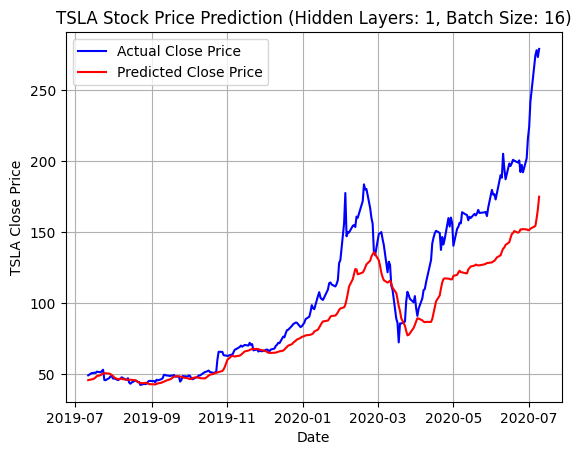

In [18]:
# Define different model configurations
model_configs = [
    {'hidden_layers': 4, 'batch_size': 64},
    {'hidden_layers': 2, 'batch_size': 64},
    {'hidden_layers': 1, 'batch_size': 64},
    {'hidden_layers': 4, 'batch_size': 32},
    {'hidden_layers': 2, 'batch_size': 32},
    {'hidden_layers': 1, 'batch_size': 32},
    {'hidden_layers': 4, 'batch_size': 16},
    {'hidden_layers': 2, 'batch_size': 16},
    {'hidden_layers': 1, 'batch_size': 16}
]

# Train and evaluate models with different configurations
for config in model_configs:
    hidden_layers = config['hidden_layers']
    batch_size = config['batch_size']

    #Avtivation Function: ReLU, Drop out:50%
    model = Sequential()
    for _ in range(hidden_layers):
        model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.5))
    model.add(LSTM(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    #model.summary()
    #opt: ADAM, Loss: MSE
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

    predicted_prices = model.predict(X_test)

    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    #Display the results table
    print(results_df)

    # Plot the results
    plt.title(f'TSLA Stock Price Prediction (Hidden Layers: {hidden_layers}, Batch Size: {batch_size})')
    plt.plot(data.index[look_back:][len(X_train):], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[look_back:][len(X_train):], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()

Epoch 1/100
32/32 [==============================] - 6s 42ms/step - loss: 0.0080
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0018
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0014
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 8.9590e-04
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 3.9707e-04
Epoch 6/100
32/32 [==============================] - 3s 86ms/step - loss: 3.5265e-04
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 3.1041e-04
Epoch 8/100
32/32 [==============================] - 1s 41ms/step - loss: 3.1930e-04
Epoch 9/100
32/32 [==============================] - 1s 44ms/step - loss: 3.4164e-04
Epoch 10/100
32/32 [==============================] - 1s 41ms/step - loss: 3.2060e-04
Epoch 11/100
32/32 [==============================] - 1s 42ms/step - loss: 2.9588e-04
Epoch 12/100
32/32 [==============================] - 1s 42ms/step - loss: 

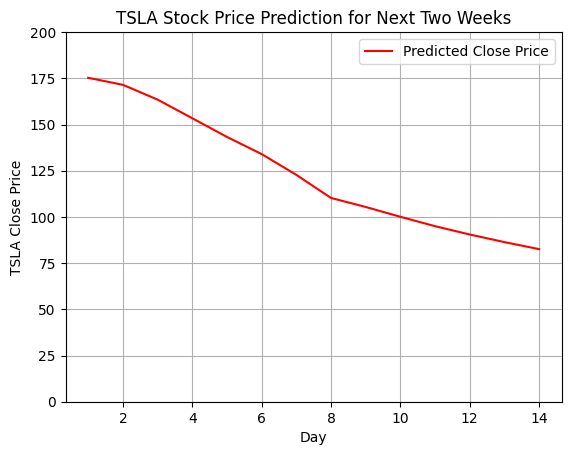

In [23]:
# Build and train model
model_new = Sequential()
for _ in range(2):
    model_new.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_new.add(Dropout(0.5))
model_new.add(LSTM(units=256, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(1))

model_new.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
model_new.fit(X_train, y_train, epochs=100, batch_size=32)

# Make future predictions
def make_future_predictions(model, data, look_back, horizon, Y_scaler):
    future_predictions = []
    last_data_points = data[-look_back:].flatten()

    for _ in range(horizon):
        input_data = last_data_points[-look_back:].reshape(1, look_back, 1)
        predicted_value = model.predict(input_data)
        predicted_value_unscaled = Y_scaler.inverse_transform(predicted_value)

        future_predictions.append(predicted_value_unscaled[0][0])

        # Append the scaled prediction to the last_data_points for the next prediction iteration
        last_data_points = np.append(last_data_points, predicted_value)

    return np.array(future_predictions)

predicted_2_weeks = make_future_predictions(model_new, X_test, look_back, 14, Y_scaler)

days = list(range(1, 15))

plt.plot(days, predicted_2_weeks, label='Predicted Close Price', color='r')
plt.xlabel('Day')
plt.ylabel('TSLA Close Price')
plt.title('TSLA Stock Price Prediction for Next Two Weeks')
plt.ylim(0,200)
plt.grid(True)
plt.legend()
plt.show()